# Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
import pickle

# Loading Data

In [2]:
df=pd.read_excel('customer_churn_large_dataset.xlsx')

# How our data looks


In [3]:
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
39932,39933,Customer_39933,23,Female,Houston,18,87.69,474,1
55,56,Customer_56,47,Male,Miami,8,35.43,166,0
2304,2305,Customer_2305,28,Female,Houston,5,55.91,177,0
7274,7275,Customer_7275,23,Female,Miami,24,94.97,433,0
95850,95851,Customer_95851,57,Female,Houston,6,33.63,377,1


In [5]:
df.shape

(100000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
 9   Total Amount Paid           100000 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 7.6+ MB


# Checking Missing Value

In [7]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
Total Amount Paid             0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,100000.0,50000.500000,28867.657797,1.00,25000.75,50000.50,75000.2500,100000.00
Age,100000.0,44.027020,15.280283,18.00,31.00,44.00,57.0000,70.00
Subscription_Length_Months,100000.0,12.490100,6.926461,1.00,6.00,12.00,19.0000,24.00
Monthly_Bill,100000.0,65.053197,20.230696,30.00,47.54,65.01,82.6400,100.00
Total_Usage_GB,100000.0,274.393650,130.463063,50.00,161.00,274.00,387.0000,500.00
Churn,100000.0,0.497790,0.499998,0.00,0.00,0.00,1.0000,1.00
Total Amount Paid,100000.0,811.779157,533.858809,30.06,378.24,726.34,1161.8625,2399.52


# Checking duplicated Data

In [9]:
df.duplicated().sum()

0

# Checking for Correlation between Variables

In [10]:
df.corr()

C:\Users\deves\AppData\Local\Temp\ipykernel_5988\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total Amount Paid
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586,0.005002
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559,0.004375
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328,0.841891
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211,0.466938
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842,0.000199
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000,0.001325
Total Amount Paid,0.005002,0.004375,0.841891,0.466938,0.000199,0.001325,1.000000


This Data has close to no correlation between variables and target

# Exploratory Data Analysis

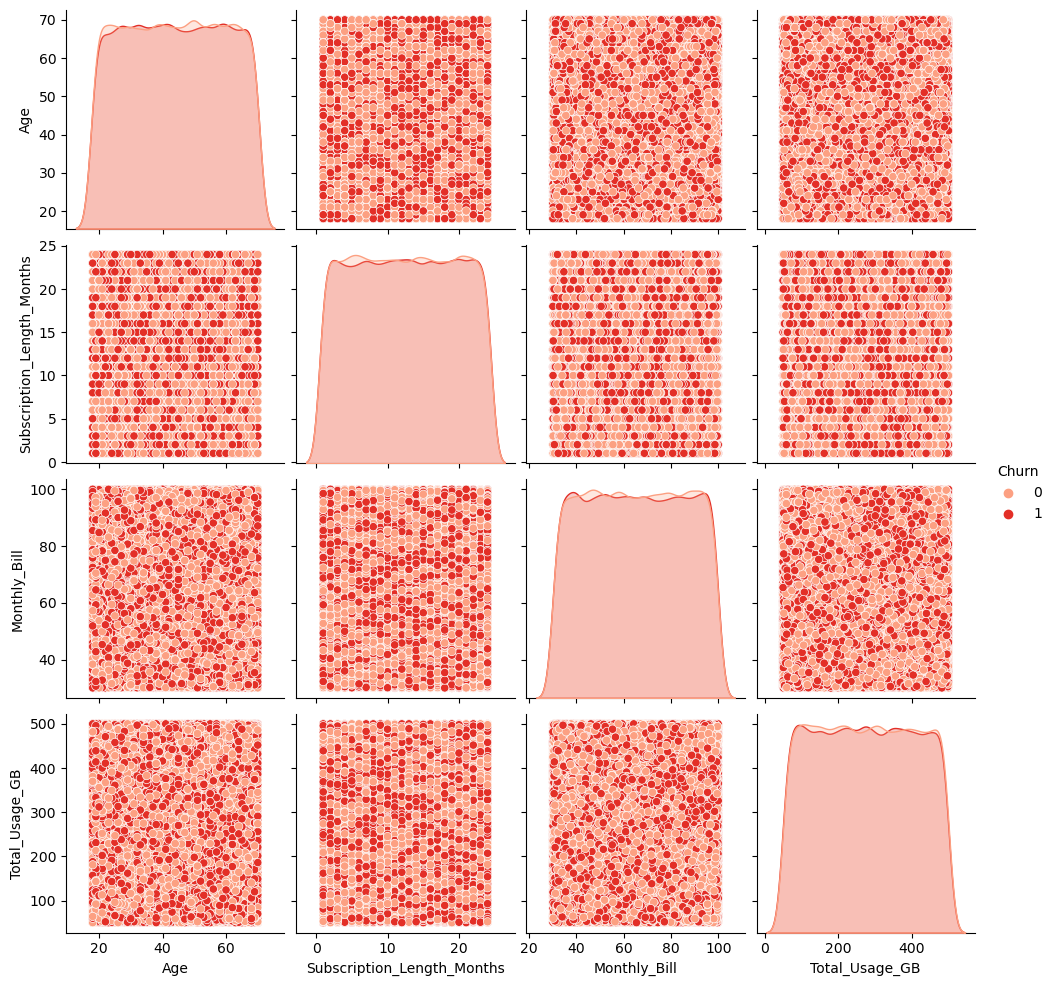

In [11]:
sns.pairplot(df[['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn']],hue='Churn',palette='Reds')

In [12]:
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total Amount Paid
4558,4559,Customer_4559,31,Female,Houston,16,86.47,322,1,1383.52
58166,58167,Customer_58167,55,Female,New York,18,60.62,461,0,1091.16
1072,1073,Customer_1073,50,Female,New York,14,66.91,65,0,936.74
44667,44668,Customer_44668,25,Male,New York,17,39.86,115,0,677.62
55982,55983,Customer_55983,58,Female,New York,7,30.68,449,1,214.76


<Axes: ylabel='Age'>

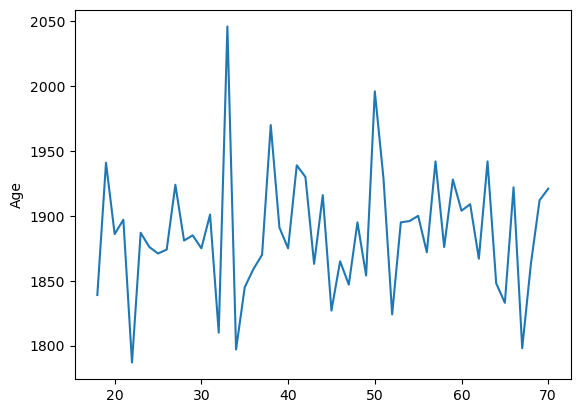

In [13]:
sns.lineplot(df['Age'].value_counts())

<Axes: xlabel='Churn', ylabel='count'>

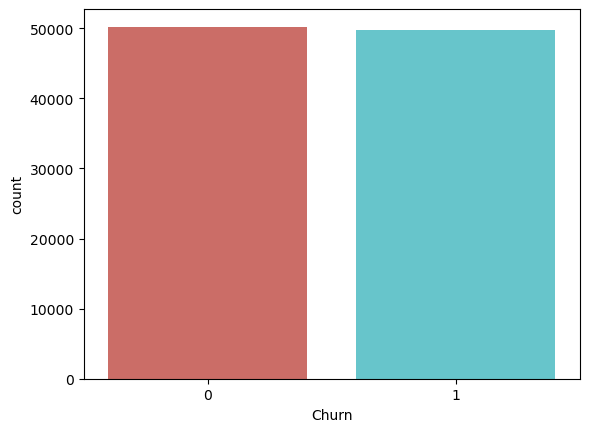

In [14]:
sns.countplot(df,x='Churn',palette='hls')

<Axes: xlabel='Gender', ylabel='count'>

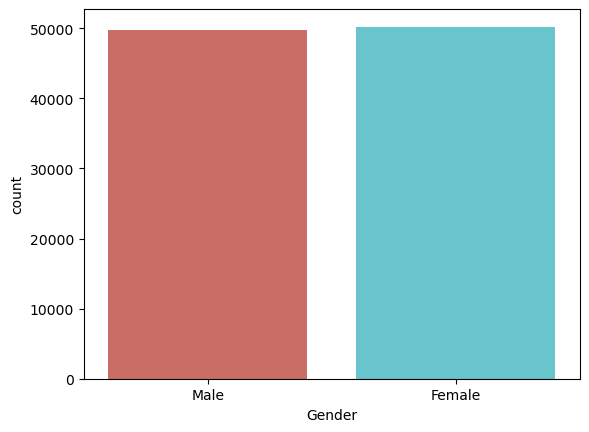

In [15]:
sns.countplot(df,x='Gender',palette='hls')

<Axes: xlabel='Location', ylabel='count'>

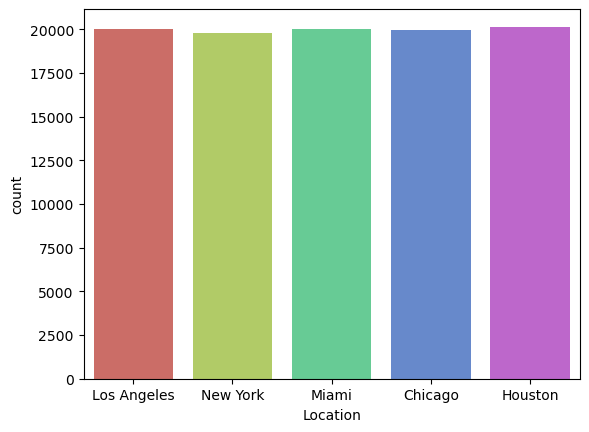

In [16]:
sns.countplot(df,x='Location',palette='hls')

<Axes: ylabel='Subscription_Length_Months'>

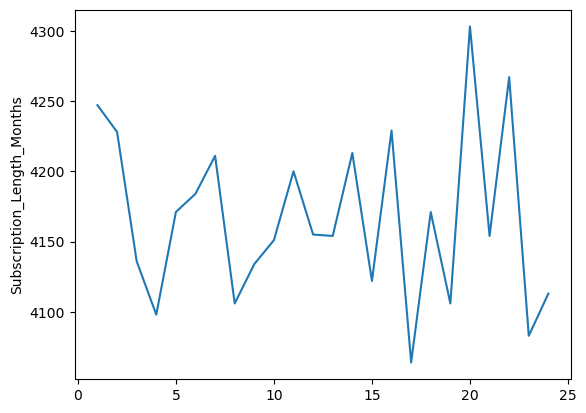

In [17]:
sns.lineplot(df['Subscription_Length_Months'].value_counts())

<Axes: xlabel='Monthly_Bill', ylabel='Count'>

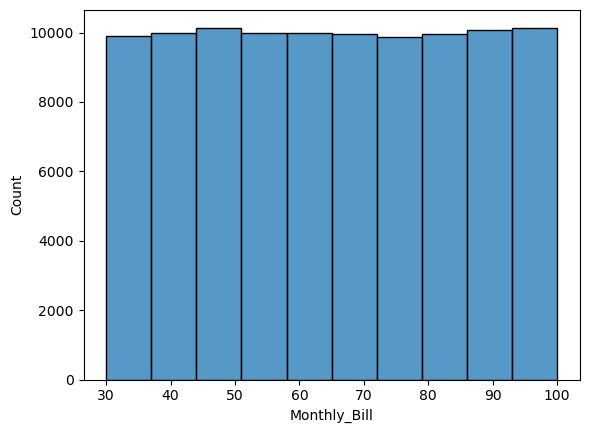

In [18]:
sns.histplot(df,x='Monthly_Bill',bins=10)

<Axes: xlabel='Total_Usage_GB', ylabel='Count'>

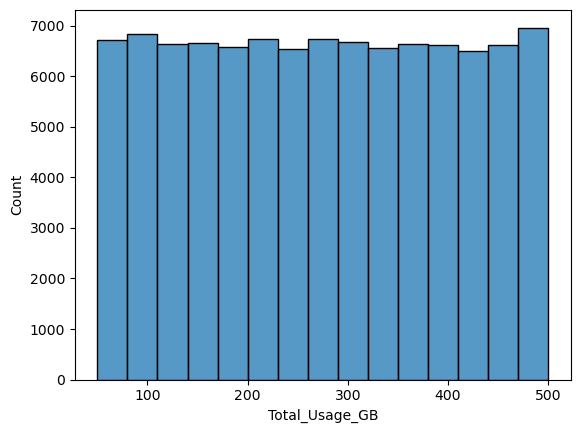

In [19]:
sns.histplot(df,x='Total_Usage_GB',bins=15)

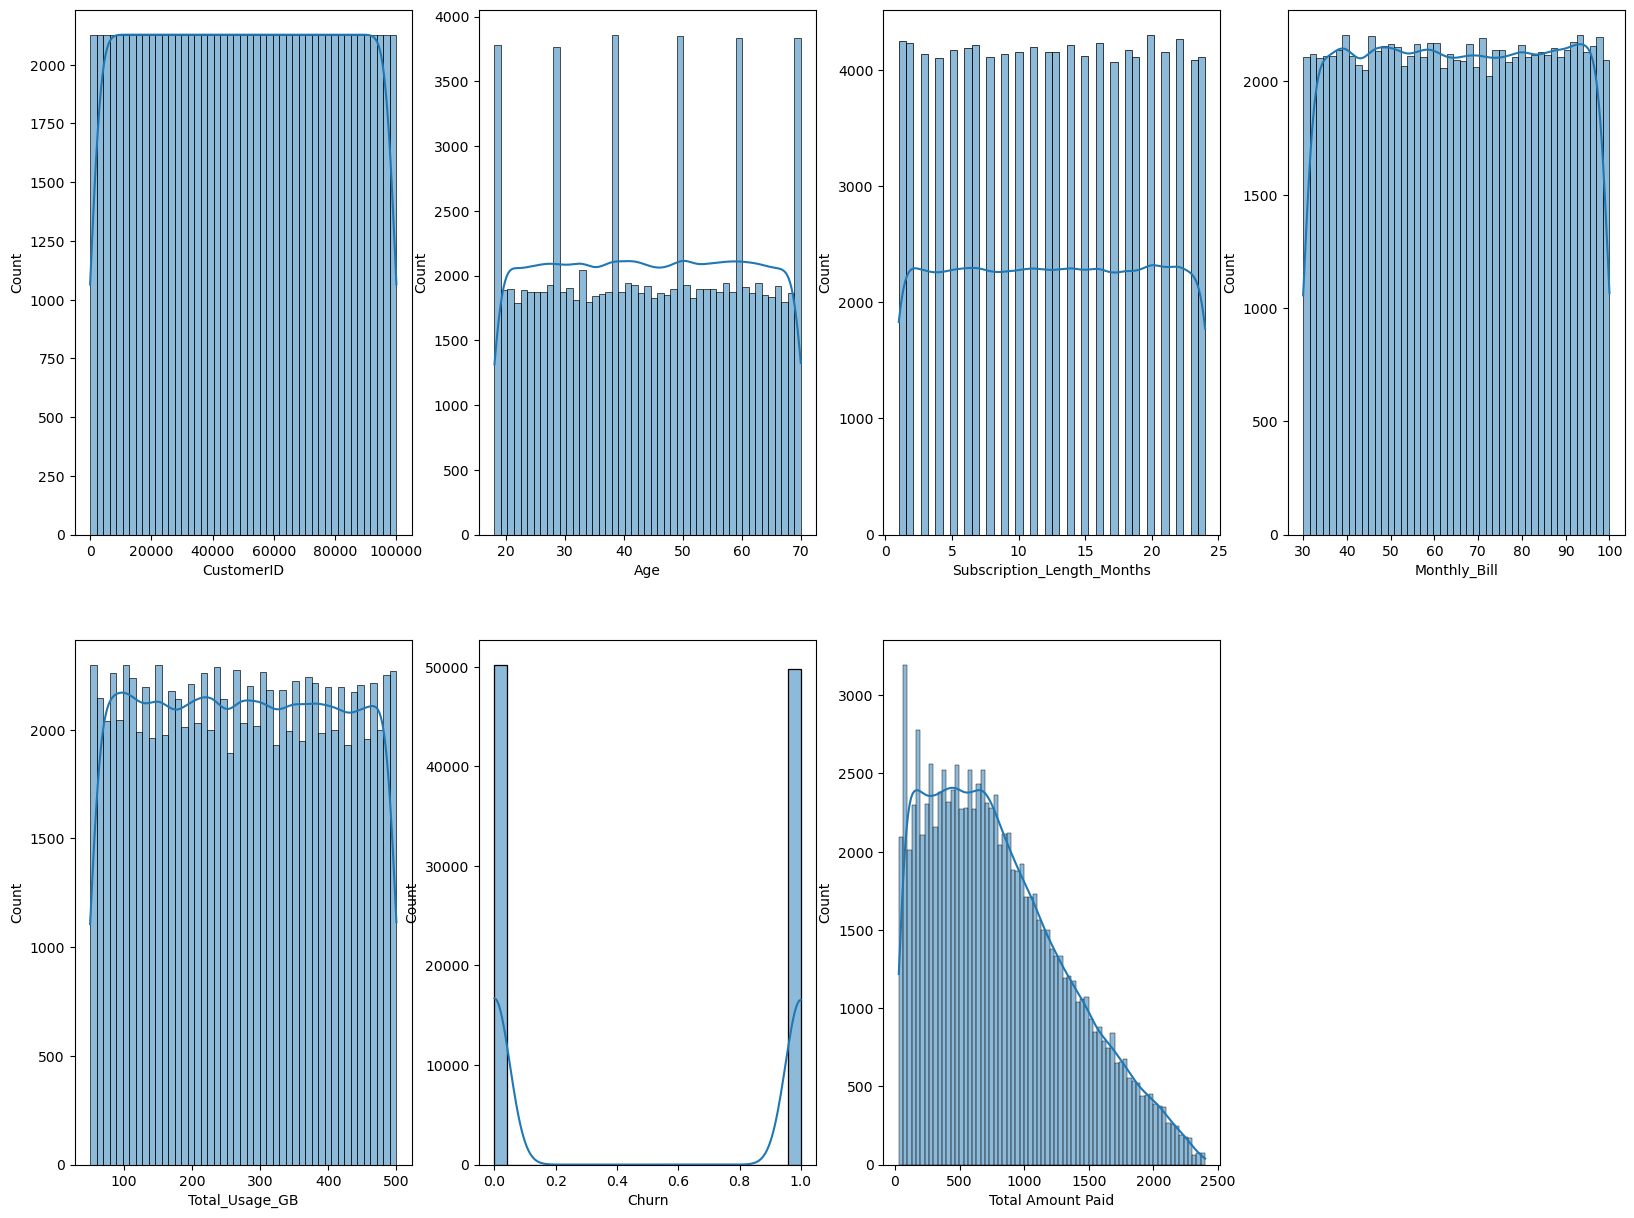

In [20]:
Num_col=df.select_dtypes(exclude=['object'])
plt.figure(figsize=(20,15))
for i,col in enumerate(Num_col):
    ax=plt.subplot(2,4,i+1)
    sns.histplot(df[col],kde=True)

In [21]:
df=df.drop(['Name','CustomerID'],axis=1)

Dropping Name and CustomerID column as they serve no purpose in model training.

# Checking for outliers using IQR Method

In [22]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Min=Q1-(IQR*1.5)
Max=Q3+(IQR*1.5)

C:\Users\deves\AppData\Local\Temp\ipykernel_5988\2979823927.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
C:\Users\deves\AppData\Local\Temp\ipykernel_5988\2979823927.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)


In [23]:
df=df[~(df>Max)|(df<Min)]

C:\Users\deves\AppData\Local\Temp\ipykernel_5988\79202887.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~(df>Max)|(df<Min)]


# Standardization

In [25]:
col_float=['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
for i in df[col_float]:
    df[i]=MinMaxScaler().fit_transform(df[[i]])

# One hot encoding for Categorical columns

In [26]:
df=pd.get_dummies(df,columns=['Gender','Location'])

In [28]:
X=df.drop(['Churn'],axis=1)
y=df['Churn']

# Train-Test Split 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

# Support Vector Machine Algorithm

In [55]:
SVCclassifier=SVC(kernel='poly')

In [56]:
SVCclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [57]:
SVCclassifier.score(X_train,y_train)

0.5145857142857143

In [58]:
y_pred=SVCclassifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.68      0.58     15006
           1       0.50      0.32      0.39     14994

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000

[[10187  4819]
 [10128  4866]]
0.5017666666666667


Data has no correlation which makes it hard to train an accurte model which can be seen through results

# K-Nearest Neighbors

In [509]:
knnscore=[]
for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knnscore.append(knn.score(X_test,y_test))


In [61]:
knnscore.max()

NameError: name 'knnscore' is not defined

In [511]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn_y_pred = kn.predict(X_test)
kn_cm = confusion_matrix(y_test,kn_y_pred)
kn_accuracy = accuracy_score(y_test,kn_y_pred)
print("confusion matrics=",kn_cm)
print("  ")
print("accuracy=",kn_accuracy)

confusion matrics= [[7707 7299]
 [7690 7304]]
  
accuracy= 0.5003666666666666


# Naive Bayes

In [599]:
NBG = GaussianNB()
NBG.fit(X_train, y_train)
NBG.score(X_train,y_train)

GaussianNB()

In [601]:
y_pred = NBG.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54     15006
           1       0.50      0.42      0.46     14994

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

[[8800 6206]
 [8675 6319]]
0.5039666666666667


# Random Forest Classifier

In [602]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_cm = confusion_matrix(y_test,rf_y_pred)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("confusion matrics=",rf_cm)

print("accuracy=",rf_accuracy)

confusion matrics= [[9153 5853]
 [9070 5924]]
accuracy= 0.5025666666666667


# Logistic Regression

In [603]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_train,y_train)

0.5046142857142857

In [517]:

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.72      0.59     15006
           1       0.51      0.29      0.37     14994

    accuracy                           0.50     30000
   macro avg       0.51      0.50      0.48     30000
weighted avg       0.51      0.50      0.48     30000

[[10816  4190]
 [10682  4312]]
0.5042666666666666


Tried to improve accuracy with help of Grid search and other Ensemble Algorithms

In [32]:
from sklearn.model_selection import GridSearchCV

# Adaboost Classifier

In [618]:
clf = AdaBoostClassifier()
params={'n_estimators':[10,50,100,250,500],'learning_rate':[0.1,1,0.01,10]}
grid_search = GridSearchCV(estimator=clf,param_grid=params, n_jobs=-1, cv=5, scoring='accuracy')

In [619]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 10],
                         'n_estimators': [10, 50, 100, 250, 500]},
             scoring='accuracy')

In [62]:
grid_search.best_score_

NameError: name 'grid_search' is not defined

In [63]:
grid_search.best_params_

NameError: name 'grid_search' is not defined

All Algorithms gave same result of 50% as data variables had no correlation with target. 

# Saving SVM model using pickle. 

In [66]:
with open('churn_pred','wb') as f:
    pickle.dump(SVCclassifier,f)